COMP 3625 - ASG2

In [1]:
import os
import tarfile 
import urllib
import sklearn
from sklearn import cluster

import pandas as pd
pd.plotting.register_matplotlib_converters()
from pandas.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# tell matplotlib to use Jupyter to plot inline. 
%matplotlib inline 
import matplotlib.pyplot as plt 



Read in the file:

In [2]:
#dir = "C:/Users/janel/OneDrive/Desktop/"
dir = input("Enter file path: ")
data_url = dir + "globalterrorismdb_0718dist.csv"
data = pd.read_csv(data_url, encoding = "ISO-8859-1")
data.head()

C:\Users\smith\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN




Exploring the data:

In [3]:
print("The global terrorism dataset has {} rows and {} columns.".format(data.shape[0], data.shape[1]))

for col in data.columns:
    print(col)

The global terrorism dataset has 181691 rows and 135 columns.
eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptyp

Dropping columns that have 80%-100% null rows.

In [49]:
#data.drop(columns=["resolution","alternative_txt","attacktype2","attacktype2_txt","weapsubtype3_txt","weaptype4"])

# 80% data minimum
limitPer = len(data) * .80
#data_trimmed = data.dropna(thresh=limitPer, axis=1)
data.dropna(thresh=limitPer, axis=1, inplace=True)

After dropping unwanted rows:

In [50]:
print("The global terrorism dataset has {} rows and {} columns.".format(data.shape[0], data.shape[1]))

for col in data.columns: 
    print(col)

The global terrorism dataset has 134042 rows and 47 columns.
eventid
iyear
imonth
iday
extended
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
crit1
crit2
crit3
doubtterr
multiple
success
suicide
attacktype1
attacktype1_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
target1
natlty1
natlty1_txt
gname
guncertain1
individual
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
nkill
nwound
property
ishostkid
dbsource
INT_LOG
INT_IDEO
INT_MISC
INT_ANY


get region numbers and region names, which region has the most attacks using region name and region id given. 

This data set has 12 regions, each region has been given a region id:


Region ID       Region Name                     Number of attacks in each Region
1               North America                   3456
2               Central America & Caribbean     10344
3               South America                   18978
4               East Asia                       802
5               Southeast Asia                  12485
6               South Asia                      44974
7               Central Asia                    563
8               Western Europe                  16639
9               Eastern Europe                  5144
10              Middle East & North Africa      50474
11              Sub-Saharan Africa              17550
12              Australasia & Oceania           282


<AxesSubplot:>

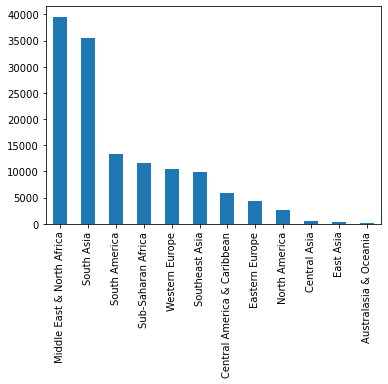

In [51]:
# displays highest to lowest occurances of each region 
region_text = data["region_txt"].value_counts()
region_id = data["region"].value_counts()
# print(region_text)
# print(region_id)

#graph to show amount of attacks in each region 
region_text.plot(kind='bar')

most attacks based on years

2014    13006
2015    11286
2013    10487
2016    10098
2017     7812
2012     7433
2011     4382
2010     4225
2009     3952
2008     3888
1992     3740
1991     3662
1989     3604
1990     3185
1988     3019
2007     2612
1987     2303
1994     2238
2006     2024
1984     2011
1996     1871
1995     1814
1997     1785
1985     1745
1986     1716
2005     1632
2001     1580
1980     1564
1979     1506
2000     1418
1981     1409
1983     1407
1982     1240
1999     1099
2002     1083
2003     1022
2004      908
1978      883
1977      721
1998      667
1970      493
1976      391
1975      301
1971      258
1974      237
1972      191
1973      134
Name: iyear, dtype: int64


<AxesSubplot:>

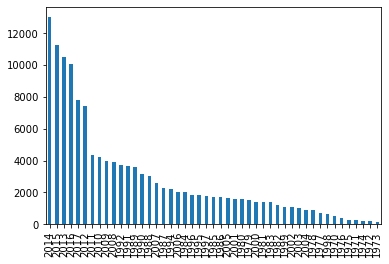

In [52]:
# displays highest to lowest occurances of attacks per year
years = data["iyear"].value_counts()
print(years)
years.plot(kind='bar')

most attacks based on days

15    4763
1     4670
12    4503
13    4500
7     4497
4     4481
9     4458
3     4457
10    4448
28    4445
16    4433
22    4430
19    4419
2     4410
5     4394
14    4388
25    4386
11    4383
27    4378
20    4372
21    4346
17    4326
26    4324
8     4320
18    4302
24    4294
6     4290
23    4217
29    4006
30    3719
31    2305
0      378
Name: iday, dtype: int64


<AxesSubplot:>

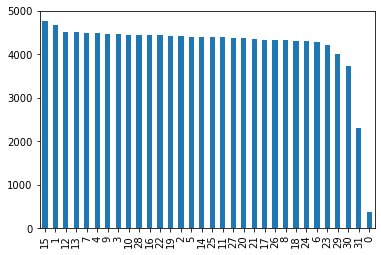

In [53]:
days = data["iday"].value_counts()
print(days)
days.plot(kind='bar')

most attacks based on days

5     12262
7     12063
8     11810
10    11453
6     11360
4     11269
11    11149
3     11076
1     10989
9     10499
2     10235
12     9871
0         6
Name: imonth, dtype: int64


<AxesSubplot:>

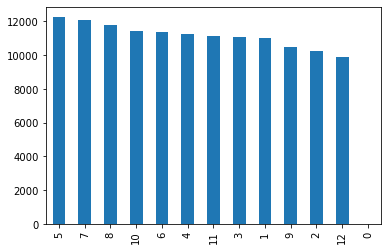

In [54]:
months = data["imonth"].value_counts()
print(months)
months.plot(kind='bar')


In [55]:
summary = data['summary']
print(summary)

KeyError: 'summary'

Split data into test and train sections using a stratified sample based on region

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit( n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split( data, data["region"]): 
    strat_train_set = data.reindex(train_index)
    strat_test_set = data.reindex(test_index)

print("Rows before trim: ", strat_train_set.shape[0])
strat_train_set.dropna(inplace=True, axis=0) #this should remove all rows with NaN values (with atlest one missing element)
print("Rows After trim: ", strat_train_set.shape[0])

print(type(strat_train_set['latitude']))

#strat_train_set = strat_train_set[strat_train_set.latitude != np.nan]

print( "\nThe training set has {:d} rows and {:d} columns.".format( strat_train_set.shape[0], strat_train_set.shape[1]))
print( "The test set has {:d} rows and {:d} columns.\n\n".format( strat_test_set.shape[0], strat_test_set.shape[1]))

# Look at the distributions: 

print( data["region"].value_counts() / len( data), "\n")   
print( strat_test_set["region"].value_counts() / len( strat_test_set), "\n")   
print( strat_train_set["region"].value_counts() / len( strat_train_set), "\n")


Rows before trim:  107233
Rows After trim:  79065
<class 'pandas.core.series.Series'>

The training set has 79065 rows and 47 columns.
The test set has 26809 rows and 47 columns.


10    0.295027
6     0.264268
3     0.099111
11    0.086637
8     0.078378
5     0.073387
2     0.043815
9     0.031833
1     0.019658
7     0.003372
4     0.003193
12    0.001320
Name: region, dtype: float64 

10.0    0.192062
6.0     0.182998
3.0     0.096908
8.0     0.072513
11.0    0.051550
5.0     0.047708
2.0     0.043269
9.0     0.021821
1.0     0.019173
7.0     0.002984
4.0     0.002909
12.0    0.001156
Name: region, dtype: float64 

10.0    0.257181
6.0     0.253816
3.0     0.128730
8.0     0.097945
11.0    0.071587
5.0     0.068741
2.0     0.059483
9.0     0.029229
1.0     0.023791
7.0     0.004338
4.0     0.003782
12.0    0.001379
Name: region, dtype: float64 



Visualize the longtitude and latitude 

[6.0, 4.0]


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

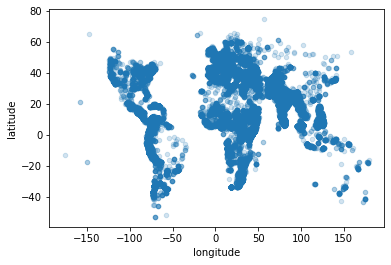

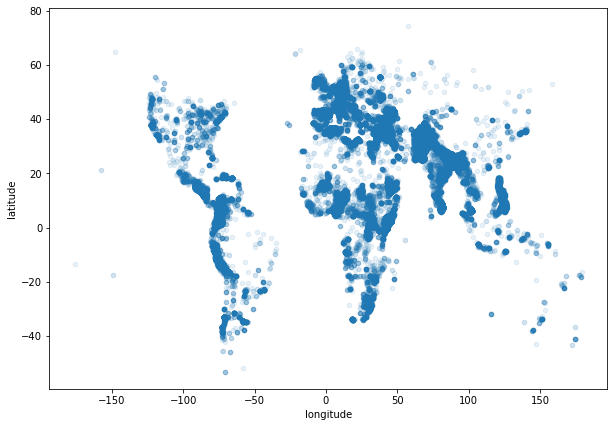

In [ ]:
train = strat_train_set.copy()
# print(train.head)

# We have geographic data, so lets see how it is distributed. 

train.plot( kind = "scatter", x = "longitude", y = "latitude", alpha = 0.2)

# That is puny. Lets make it bigger. 

# What is the default size? 
print( plt.rcParams["figure.figsize"])

train.plot( kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1, figsize = (10,7))

In [ ]:

# coordinates.columns = ['latitude','longtitude']
lat = strat_train_set['latitude']
long = strat_train_set['longitude']


coordinates = [lat,long]
# print(coordinates)

regions = np.array(coordinates)
print(regions)

k =12
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(regions)

# labels are the cluster the point belongs to. 
labels = kmeans.labels_
# Centroids are the center of the cluster. 
centroids = kmeans.cluster_centers_
print(centroids)
print(labels)

for i in range(k):
    # select only data observations with cluster label == i
    ds = regions[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()

[[ 32.197468  15.325443  50.836426 ...        nan  24.159623 -13.65311 ]
 [ 68.347344  44.211895   4.367415 ...        nan  83.803807 -73.95396 ]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# import plotly.express as px

# fig = px.scatter_geo(data_trimmed,lat='latitude',lon='longitude')
# fig.update_layout(title = 'World map', title_x=0.5)
# fig.show()